# General plotting: introduction to Matplotlib

* **matplotlib** is a Python plotting library for producing publication quality figures
    * allows for interactive, cross-platform control of plots
    * makes it easy to produce static raster or vector graphics
        * gives the developer complete control over the appearance of their plots, while still being usable through a powerful defaults system
* standard scientific plotting library
* online documentation is on [matplotlib.org](https://matplotlib.org/index.html), with lots of examples in the [gallery](https://matplotlib.org/gallery.html)
* very widely used

* behaves similarly to Matlab

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

To be efficient with **matplotlib**, you first need to understand its terminology.

## Parts of a Figure

<img src="../figures/matplotlib_figure_parts.png" style="height:80%; width:75%;">

### Figure, Axes, Axis

* **Figure** is the whole image, the top-level 'container' that holds all objects of an image.
* **Axes** is the region of a **Figure** that displays your data. Most plotting occurs here! Very similar to a subplot
* **Axes** contains **Axis** objects (x axis,y axis) which control the data limits.
* **Figure** can have any number of **Axes**, but to be useful should have at least one.

In [ ]:
fig = plt.figure() # Create a figure
axes = fig.add_subplot(111) # add one Axes to Figure

Usually an **Axes** is set up with a call to `fig.add_subplot()`, `plt.subplot()`, or `plt.subplots()` 

The most flexible option is the one liner `plt.subplots()`

In [ ]:
fig,axes = plt.subplots()

This creates an identical result to the cell above but with only one line of code. It is also much more extendable as we will see later

### Line plots

Let's draw two cosine functions of different amplitude on the same **Axes**.

In [4]:
# Create data
X = np.linspace(-np.pi, np.pi, 100, endpoint=True)  # evenly spaced 1D array with 100 numbers from -pi to pi inclusive
Y1 = np.cos(X)
Y2 = 2*np.cos(X)

In [ ]:
# Plot data
fig, axes = plt.subplots() # calling subplots without any arguments creates one figure and one axes by default
axes.plot(X, Y1)
axes.plot(X, Y2);

** Tip: by adding a semicolon at the end of a function, the output is suppressed so the notebook doesn't print a line of text above the figure

### Default and named colors

![](../figures/dflt_style_changes-1.png)

**Exercise 0 (10 mins)**. The figure before is generated using the default settings. The code below shows these settings explicitly. Play with the values to explore their effect. For details on changing properties see [line plots on the matplotlib website](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)

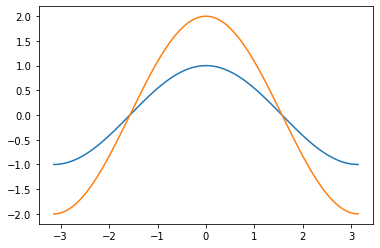

In [6]:
# Plot data (with explicit plotting settings)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
axes.plot(X, Y1, color='C0', linewidth=1.5, linestyle='-',alpha=1.0)
axes.plot(X, Y2, color='C1', linewidth=1.5, linestyle='-',alpha=1.0)

In [ ]:
# Your code here


**Exercise 1 (10 mins)**. Having integer numbers on the x axis here might divert reader's attention from the critical points of the graph.

1. Change **xticks** and **xticklabels** into multiples of $\pi$. Use [`axes.set_xticks()`](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.axes.Axes.set_xticks.html) and [`axes.set_xticklabels()`](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.axes.Axes.set_xticklabels.html).

\*\* Tip: use `np.pi` for **xticks** and '\$\pi$' for **xticklabels**. format strings in LaTeX by prepending 'r'ie `axes.set_xticklabels([r'$\pi$', ...])`

In [ ]:
# Your code here


**Exersise 2 (5 mins)**. Add a legend.
1. Give both cosine functions a name by adding an extra keyword argument, a label, to `axes.plot()`.
2. Add a legend object to **Axes**.

In [ ]:
# Your code here


**Exercise 3 (10 mins)**. Annotate an interesting point on a graph, for example, $2\cos(\frac{\pi}{4})$.
1. Add a single point to the graph by using `axes.plot(..., marker='o')`.
2. Use `axes.annotate(s, xy=..., xytext=...)` to add annotation.

** Tip: visit [annotations](https://matplotlib.org/users/annotations_intro.html).

In [ ]:
# Your code here


### Multiple subplots

`plt.subplots()` is a function that creates a figure and a grid of subplots with a single call, while providing reasonable control over how the individual plots are created. 

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5)) # or plt.subplots(2,3,figsize=(15,5))
axes[0,0].set_title('subplot[0,0]', fontsize=18);
axes[0,1].set_title('subplot[0,1]', fontsize=18);
axes[0,2].set_title('subplot[0,2]', fontsize=18);
axes[1,0].set_title('subplot[1,0]', fontsize=18);
axes[1,1].set_title('subplot[1,1]', fontsize=18);
axes[1,2].set_title('subplot[1,2]', fontsize=18);

for ax in axes.ravel(): # you can loop over axes
    ax.set_xticks([]);
    ax.set_yticks([]);

## Subplots with real data

To practice our plotting we are going to work with data from the NOAA ESRL Carbon Cycle Cooperative Global Air Sampling Network.

Source: https://www.esrl.noaa.gov/gmd/dv/data/

Monthly averages of atmospheric carbon dioxide ($CO_2$), methane ($CH_4$) dry air mole fractions, $\delta^{13}C/CO_{2}$ and $\delta^{13}C/CH_{4}$.

Stations: 
* CGO = Cape Grim, Tasmania, Australia
* MHD = Mace Head, County Galway, Ireland

Units:
* $CO_2$ - ppm
* $CH_4$ - ppb
* $\delta^{13}C/CO_{2}$ - ‰ (per mil)
* $\delta^{13}C/CH_{4}$ - ‰ (per mil)

Data stored in a text file. The top row states the number of header lines in the file. No title headers. The actual data is ogranized as following:

Station code | Year | Month | Measurement

CGO            1984     4       341.63  

#### Read data from a text file

The simplest way to load data from a text file in `numpy` is to use `np.loadtxt()` function.

In [ ]:
# np.loadtxt() # hit Shift+Tab+Tab

This function has a lot parameters that you can adjuct to fit  your data format. Here we use only:

`np.loadtxt(fname, skiprows=..., usecols=..., unpack=...)`

To find that data, the same commands as last time:

In [26]:
from pathlib import Path # A module for dealing with paths that is operating system agnostic
notebook_dir = Path.cwd() # Get the current working directory
base_dir = notebook_dir.parent.absolute() # Get the parent directory (folder that contains out working directory)
data_dir = base_dir / 'data'# Get diretory where the data is stored

In [ ]:
data = np.loadtxt(data_dir/'co2_cgo_surface-flask_1_ccgg_month.txt', skiprows=68, usecols=(1, 2, 3))
print(type(data), data.shape)

If we want to have three separate arrays for year, month and value, we can set `unpack=True` and store the output from `np.loadtxt()` function in three separate arrays.

In [28]:
year, month, value = np.loadtxt('../data/co2_cgo_surface-flask_1_ccgg_month.txt',
                                skiprows=68, usecols=(1, 2, 3), unpack=True)

In [ ]:
year[0:8]

In [ ]:
month[0:8]

In [ ]:
value[0:8]

#### Kwargs

* You can store any number of keyword arguments in a dictionary, and later unpack it when calling a function

In [14]:
# Kwargs
read_data_kwargs = dict(skiprows=68, usecols=(1, 2, 3), unpack=True)

In [15]:
# Read data to get all the datasets into arrays we can plot
# CO2 
cgo_co2_yr, cgo_co2_mn, cgo_co2_val = np.loadtxt(data_dir/'co2_cgo_surface-flask_1_ccgg_month.txt', 
                                                 **read_data_kwargs)
mhd_co2_yr, mhd_co2_mn, mhd_co2_val = np.loadtxt(data_dir/'co2_mhd_surface-flask_1_ccgg_month.txt', 
                                                 **read_data_kwargs)
# C13/C12 in CO2 (d13C (CO2))
cgo_co2c13_yr, cgo_co2c13_mn, cgo_co2c13_val = np.loadtxt(data_dir/'co2c13_cgo_surface-flask_1_sil_month.txt', 
                                                          **read_data_kwargs)
mhd_co2c13_yr, mhd_co2c13_mn, mhd_co2c13_val = np.loadtxt(data_dir/'co2c13_mhd_surface-flask_1_sil_month.txt', 
                                                          **read_data_kwargs)
# CH4
cgo_ch4_yr, cgo_ch4_mn, cgo_ch4_val = np.loadtxt(data_dir/'ch4_cgo_surface-flask_1_ccgg_month.txt', 
                                                 **read_data_kwargs)
mhd_ch4_yr, mhd_ch4_mn, mhd_ch4_val = np.loadtxt(data_dir/'ch4_mhd_surface-flask_1_ccgg_month.txt', 
                                                 **read_data_kwargs)
# C13/C12 in CH4 (d13C (CH4))
cgo_ch4c13_yr, cgo_ch4c13_mn, cgo_ch4c13_val = np.loadtxt(data_dir/'ch4c13_cgo_surface-flask_1_sil_month.txt',
                                                          **read_data_kwargs)
mhd_ch4c13_yr, mhd_ch4c13_mn, mhd_ch4c13_val = np.loadtxt(data_dir/'ch4c13_mhd_surface-flask_1_sil_month.txt', 
                                                          **read_data_kwargs)

#### Datetime

* `datetime` module helps to work with time arrays (see notebook 4)

In [16]:
from datetime import datetime

In [18]:
a_date = datetime(2019, 5, 23)

Let's apply it to each element of our arrays. 

In [29]:
%%timeit 
# Using a for loop
cgo_co2_time = []
for i, j in zip(cgo_co2_yr, cgo_co2_mn):
    cgo_co2_time.append(datetime(int(i), int(j), 1))

225 µs ± 5.09 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


<b>List comprehensions</b> are an elegant, pythonic alternative to for loops to create new lists that result from a simple operation, as is the case here:

In [30]:
# Using list comprehension
%timeit cgo_co2_time = [datetime(int(i), int(j), 1) for i, j in zip(cgo_co2_yr, cgo_co2_mn)]

199 µs ± 7.41 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [31]:
# Get the datetime for all the timeseries
cgo_co2_time = [datetime(int(i), int(j), 1) for i, j in zip(cgo_co2_yr, cgo_co2_mn)]
mhd_co2_time = [datetime(int(i), int(j), 1) for i, j in zip(mhd_co2_yr, mhd_co2_mn)]

cgo_co2c13_time = [datetime(int(i), int(j), 1) for i, j in zip(cgo_co2c13_yr, cgo_co2c13_mn)]
mhd_co2c13_time = [datetime(int(i), int(j), 1) for i, j in zip(mhd_co2c13_yr, mhd_co2c13_mn)]

cgo_ch4_time = [datetime(int(i), int(j), 1) for i, j in zip(cgo_ch4_yr, cgo_ch4_mn)]
mhd_ch4_time = [datetime(int(i), int(j), 1) for i, j in zip(mhd_ch4_yr, mhd_ch4_mn)]

cgo_ch4c13_time = [datetime(int(i), int(j), 1) for i, j in zip(cgo_ch4c13_yr, cgo_ch4c13_mn)]
mhd_ch4c13_time = [datetime(int(i), int(j), 1) for i, j in zip(mhd_ch4c13_yr, mhd_ch4c13_mn)]

**Exercise 4 (30 mins)**. Construct four subplots using the arrays created above. Add titles, x and y labels, legend. Play with optional arguments of `plot()` and try to use **kwargs**.

In [ ]:
# Your code here

# 1. Set up a grid of four subplots.


# 2. Plot the data from stations for the four variables measured. 


# 3. Set titles, x and y labels and add a legend.



## Demonstration of bar() on NAO index data

Bar plots are created in much the same way as line plots, with two arrays of equal size.

Here we use `bar()` to plot the data on North Atlantic oscillation from the NWS Climate Prediction Center. 

Data source: http://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/nao.shtml

Variable: monthly mean NAO index since January 1950 til March 2019.

Data stored in text file in the following way:

Year | Month | Value

1950 1 0.92000E+00

### Read NAO data

In [23]:
nao_yr, nao_mn, nao_val = np.loadtxt(data_dir/'nao_monthly.txt', unpack=True)

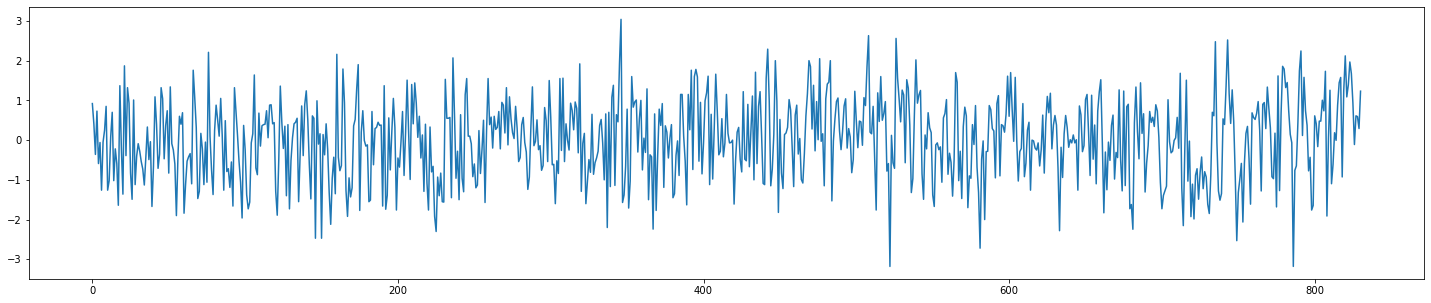

In [24]:
# Quick look at the data
fig, ax = plt.subplots(figsize=(25, 5))
ax.plot(nao_val);

Let's focus on the last 5 years and slice `nao_yr`, `nao_mn`, `nao_val` arrays accordingly.

In [84]:
# Slicing to create a subset of only the last 5*12 months
nao_yr_sub = nao_yr[-12*5:]
nao_mn_sub = nao_mn[-12*5:]
nao_val_sub = nao_val[-12*5:]

In [ ]:
# Create an array of month numbers
nao_time = np.arange(len(nao_val_sub))
nao_time

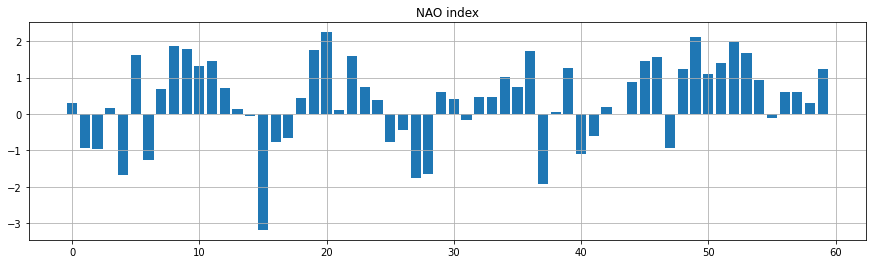

In [86]:
# Plot bar
fig, ax = plt.subplots(figsize=(15,4))
ax.bar(nao_time, nao_val_sub)
ax.set_title('NAO index')
ax.grid(True)

## Scatter plots

* display data as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis
* colorcode the data points to display an additional variable
* good for non-gridded data

`scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, edgecolors=None, **kwargs)`

In [96]:
# Generate some data (circles of random diameter)
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
area = np.pi*(15*np.random.rand(N))**2  # 0 to 15 point radii
colors = np.random.rand(N)

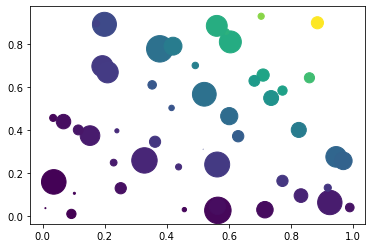

In [97]:
# Plot scatter
plt.scatter(x, y, s=area, c=x*y);

## Default sequantial and diverging colormaps

More info here, [colormaps reference](https://matplotlib.org/examples/color/colormaps_reference.html).

<img src="../figures/colormaps_reference_00.png" >
<img src="../figures/colormaps_reference_03.png" >

### Public service announcement: jet has no place in the 21st century. 
Also referred to as rainbow, jet is an [awful colormap](http://medvis.org/2012/08/21/rainbow-colormaps-what-are-they-good-for-absolutely-nothing/) that promotes [bad science](https://www.nature.com/articles/s41467-020-19160-7). Python has great preceptually uniform default colormaps. If they're not quite what you want, check out more good colourmaps crafted for [oceanography](https://matplotlib.org/cmocean/) and [geophysics](http://www.fabiocrameri.ch/colourmaps.php).
A good colormap is perceptually uniform, intuitively suits the data being plotted and is color deficient vision-friendly. 

### Countour and countourf plots

* `contour()` and `contourf()` draw contour lines and filled contours, respectively
* good for 2D gridded data

** Note: `contourf()` differs from the Matlab version in that it does not draw the polygon edges. To draw edges, add line contours with calls to `contour()`.

`contour(Z)` - make a contour plot of an array Z. The level values are chosen automatically.

`contour(X, Y, Z)` - X, Y specify the (x, y) coordinates of the surface

`contour(X, Y, Z, N)` - contour up to N automatically-chosen levels

In [90]:
# Generate some data
def f(x,y):
    return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)
# Create a (x,y) grid
n = 256
x = np.linspace(-3,3,n)
y = np.linspace(-3,3,n)
X,Y = np.meshgrid(x,y) # repeat x y times and y x times

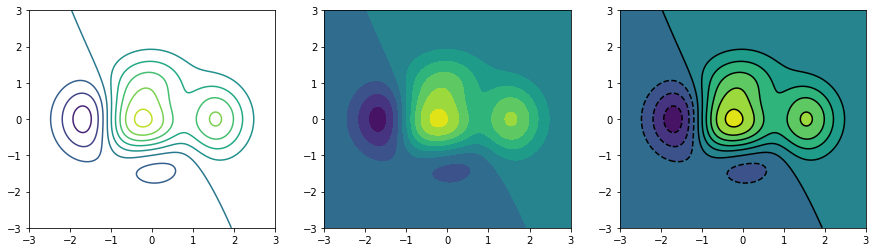

In [94]:
# Plot contour and contourf
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
ax1.contour(X, Y, f(X,Y), 10);
ax2.contourf(X, Y, f(X,Y), 10);
ax3.contour(X, Y, f(X,Y), 10, colors='k');
ax3.contourf(X, Y, f(X,Y), 10);

#### How to add a colorbar?

The **colorbar** has to have its own **Axes**!

This is created by adding a colorbar to the figure, telling matplotlib which plotted values to use for the colorbar content with `fig.colorbar(mappable, ax=ax_no)`

In [ ]:
# Plot contour and contourf with colorbars
# By default matplotlib contours negative values with a dashed line. This behavious can be changed with rcparams:
#plt.rcParams['contour.negative_linestyle']= 'solid' # Reset to default with `= 'dashed'`

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
ax1.contour(X, Y, f(X,Y), 10)
mappable2 = ax2.contourf(X, Y, f(X,Y), 10)
mappable3 = ax3.contour(X, Y, f(X,Y), 10, colors='k')
mappable3 = ax3.contourf(X, Y, f(X,Y), 10)
fig.colorbar(mappable2, ax=ax2)
fig.colorbar(mappable3, ax=ax3);


###  Saving figures

Use `fig.savefig(fname, dpi=, facecolor=, bbox_inches='tight', **kwargs)`. 

Matplotlib supports a range of vector (e.g. pdf) and raster (e.g. png) formats. The resolution of raster images can be set with the dpi (dots per inch) argument. 
Sometimes, vector quality is desirable for only some elements of a figure, while other parts can be rasterized to reduce the figure file size. In that case, [```Axes.set_rasterization_zorder```](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_rasterization_zorder.html) and the zorder plotting argument can be used to decide which figure elements should be rasterized.

In [ ]:
# Save contour and contourf with colorbars
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
ax1.contour(X, Y, f(X,Y), 10)
mappable2 = ax2.contourf(X, Y, f(X,Y), 10)
mappable3 = ax3.contour(X, Y, f(X,Y), 10, colors='k')
mappable3 = ax3.contourf(X, Y, f(X,Y), 10)
fig.colorbar(mappable2, ax=ax2)
fig.colorbar(mappable3, ax=ax3);

fig.savefig(base_dir/'figures/MY_AWESOME_FIGURE.png', dpi=300, 
            # facecolor='moccasin',
            transparent=True
            bbox_inches='tight')

In [116]:
display(fig.canvas.get_supported_filetypes())

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

## Combined figures 
In this final example we will produce a compact, combined figure useful for data comparison and for journals with tight figure limits.

First, generate some dummy data:

In [103]:
# Making a grid of temperature data with meshgrid
delta1 = 0.025
x1 = np.sin(np.arange(np.pi / 4, 3 * np.pi / 4, delta1))
y1 = 10**np.arange(0, 1, delta1/10)-1
X1, Y1 = np.meshgrid(x1, y1)
temp = X1 * Y1
distance = np.linspace(0, 90, len(x1))
depth = np.linspace(100,1,len(y1))

Then produce a first draft:

In [ ]:
# Make a 2X2 set of Axes with shared x axis and y axis
fig, axs = plt.subplots(2,2,figsize=(8, 8),sharex="col",sharey="row",
    gridspec_kw={"height_ratios": [1, 4], "width_ratios": [4, 1]})
# gridspec_kw makes Axes with different height and width ratios

# Remove all whitepace between Axes
fig.subplots_adjust(hspace=0, wspace=0)

# Makes axs into a flat array, easier to call
axs = axs.ravel()

# Plotting the surface temperature and mean temp depth profile alongside the contour plot of temp
axs[0].plot(distance, temp[-1, :]) # surface temp
axs[2].contourf(distance, depth, temp,10) # temp contour
axs[3].plot(np.nanmean(temp, 1), depth) # depth average temp

# Setting limits to make the plot tight
axs[2].set(xlim=[distance[0], distance[-1]], ylim=[depth[0], depth[-1]])
axs[3].set(xlim=[np.min(temp), np.max(temp)]);

And the final version including a colorbar and readable titles and labels:

In [ ]:
# Increasing the font size to improve readability
plt.rcParams.update({"font.size": 20})

fig, axs = plt.subplots(2, 2, figsize=(8, 8), sharex="col", sharey="row",
                        gridspec_kw={"height_ratios": [1, 4], "width_ratios": [4, 1]})
fig.subplots_adjust(hspace=0, wspace=0)
axs = axs.ravel()

axs[0].plot(distance, temp[-1, :])
# Use a different colormap
p1 = axs[2].contourf(distance, depth, temp,10,cmap = 'inferno')
axs[3].plot(np.nanmean(temp, 1), depth)

# Remove the lines and ticks from the unused top right axis
axs[1].axis("off")

# Addding labels and limits
axs[0].set(ylabel='Surface\n temp')
axs[2].set(
    xlim=[distance[0], distance[-1]],
    ylim=[depth[0], depth[-1]],
    ylabel="Depth (m)",
    xlabel="Distance (km)")
axs[3].set(xlim=[np.min(temp), np.max(temp)], xlabel="mean temp");

#  To add a colorbar below the main plot

# Make some space under the plot
fig.subplots_adjust(bottom=0.25)

# Make a colorbar axes, four numbers are in terms of position from (0,0) bottom left to (1,1) top right. 
# [Start x, start y, extend x, extend y]
cbar_ax = fig.add_axes([0.1, 0.08, 0.8, 0.04])

# add the colorbar to the axes we made with a TeX formatted label
fig.colorbar(p1, cax=cbar_ax, label=r"Temperature $\mathrm{^{\circ}C}$", orientation='horizontal');
    

## Final matplotlib exercise (40 mins)

Reproduce the figure below by using `contourf()` for modelled sea surface temperature. The code for loading and reshaping modelling data is written for you (using `np.genfromtxt()`)

![](../figures/FINAL_MATPLOTLIB_FIGURE.png)

Data source: https://podaac-tools.jpl.nasa.gov/las/UI.vm

Dataset: AMSR-E Level 3 Sea Surface Temperature for Climate Model Comparison.

Variable: Sea Surface Temperature (K).

Time : 16-JUN-2002 00:00.

Spacial resolution: 1$^{\circ}$x1$^{\circ}$, 361 by 180 points (logitude by latitude).

Total Number of Records: 64980.

In [105]:
# Read modelling sst data
lon_raw, lat_raw, sst_raw = np.genfromtxt('../data/AMSR-E_Level_3_Sea_Surface_Temperature_for_Climate_Model_Comparison.csv', delimiter=',', 
                              skip_header=10,usecols=(2, 3, 4), unpack=True)
# Reshape into a grid of sst with corresponding lat and lon coordinates
lon = np.unique(lon_raw)
lat = np.unique(lat_raw)
sst = np.reshape(sst_raw,(len(lat),len(lon)));
# Replace missing values with nans
sst[sst<0] = np.nan

In [ ]:
# Your code here
# Average the temperature for each latitude here, try np.nanmean


In [112]:
# Your code here
# Create grid of subplots


# Plot the data


# Add a colorbar


# Save your figure to a file in vector format



## References: 
* https://matplotlib.org/faq/usage_faq.html
* http://www.labri.fr/perso/nrougier/teaching/matplotlib/matplotlib.html